# Дипломный проект: Модель прогнозирования стоимости жилья для агентства недвижимости
## EDA и препросессинг

In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [28]:
data2 = pd.read_csv('data/data_2backup.csv')
data2.set_index(data2.columns[0], inplace=True)
data2.head()

,city,sqft,zipcode,state,PrivatePool,target,fireplace_type,stories_num,baths_num,beds_num,...,mean_school_rating,schools_number,mean_school_distance,grades_pk,grades_k,min_grade,max_grade,street_type,property_type,status_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,southern pines,2900.0,28387.0,NC,0,"$418,000",gas,NaN,35.0,4.0,...,5.20,8.0,5.54,1,1,2.0,12.0,ln,single family,activated
1,spokane valley,7.0,99216.0,WA,0,"$310,000",unknown,2.0,3.0,3.0,...,4.00,3.0,1.33,1,0,3.0,12.0,ave,single family,activated
2,los angeles,0.0,90049.0,CA,1,"$2,895,000",yes,1.0,2.0,3.0,...,6.67,3.0,1.96,0,1,5.0,12.0,rd,single family,activated
3,dallas,7.0,75205.0,TX,0,"$2,395,000",yes,3.0,8.0,5.0,...,9.25,4.0,0.75,1,0,4.0,12.0,ave,single family,activated
4,palm bay,NaN,32908.0,FL,0,"$5,000",unknown,NaN,NaN,NaN,...,4.67,3.0,4.08,1,0,6.0,12.0,st,land,activated


## Проверить есть ли малоинформативные признаки? Есть смысл это делать после заполнения пропусков

In [29]:
target = data2['target'].copy()

In [30]:
(data2.isna().sum()*100/data2.shape[0]).sort_values(ascending=False)

stories_num             40.599175
beds_num                29.653618
baths_num               28.608773
age                     16.860692
sqft                    10.975781
status_type             10.583136
property_type            9.208479
mean_school_rating       1.365908
max_grade                1.146122
min_grade                1.146122
mean_school_distance     1.135782
schools_number           1.135782
target                   0.657767
city                     0.009014
state                    0.001060
street_type              0.000530
zipcode                  0.000530
parking_type             0.000000
is_remodeled             0.000000
fireplace_type           0.000000
grades_pk                0.000000
grades_k                 0.000000
PrivatePool              0.000000
heating_type             0.000000
dtype: float64

In [31]:
data2.dtypes.sort_index()

PrivatePool               int64
age                     float64
baths_num               float64
beds_num                float64
city                     object
fireplace_type           object
grades_k                  int64
grades_pk                 int64
heating_type             object
is_remodeled              int64
max_grade               float64
mean_school_distance    float64
mean_school_rating      float64
min_grade               float64
parking_type             object
property_type            object
schools_number          float64
sqft                    float64
state                    object
status_type              object
stories_num             float64
street_type              object
target                   object
zipcode                 float64
dtype: object

## Удаление дубликатов

In [32]:
# Удаление строк, для которых таргет является неопределенным

na_target_index=target[target.isna()].index
print('Кол-во пропусков в таргете:', len(data2.index.intersection(na_target_index)))
data2.drop(data2.index.intersection(na_target_index), inplace=True)
print('Текущая длина датасета:', data2.shape[0])

Кол-во пропусков в таргете: 2481
Текущая длина датасета: 374704


In [33]:
# Удалим дублирующиеся значения без учета целевого признака
print('Число дубликатов без учета целевого признака:', data2.drop('target', axis=1).duplicated().sum())
no_target_dupl_index = data2[data2.drop('target', axis=1).duplicated()==True].index
data2.drop(no_target_dupl_index, axis=0, inplace=True)
print('Текущее число строк датасета:', data2.shape[0])

Число дубликатов без учета целевого признака: 16623
Текущее число строк датасета: 358081


## Выбросы

удалить так же grades pk k как бинарные
min max grade, zipcode

In [34]:
data2['mean_school_distance'].replace(r'nan', np.NaN, regex=True, inplace=True)

In [35]:
# Выберем следующие признаки для визуализации
num_columns = ['sqft', 'stories_num', 'baths_num', 'beds_num', 'age', 'mean_school_rating', 'schools_number', 'mean_school_distance']
data2['mean_school_distance'] = data2['mean_school_distance'].astype('float')

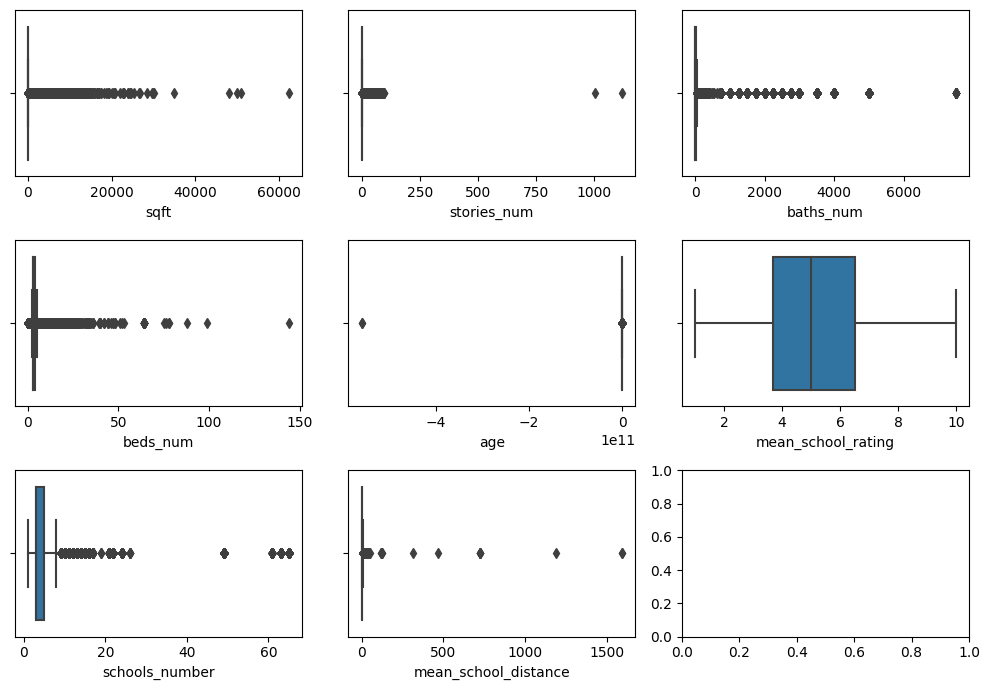

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7))

feature_n = 0
for row in [0, 1, 2]:
    if feature_n > 7: break
    for col in [0, 1, 2]:  
        if feature_n > 7: break
        sns.boxplot(x=data2[num_columns[feature_n]], ax=axes[row, col])
        feature_n += 1
    

plt.tight_layout()
plt.show()

# По графикам заметно:
# - пять признаков имеют сильную ассиметрию вправо,
# - признак возраста имеет отрицательные значения


c:\Users\Питерские котики\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


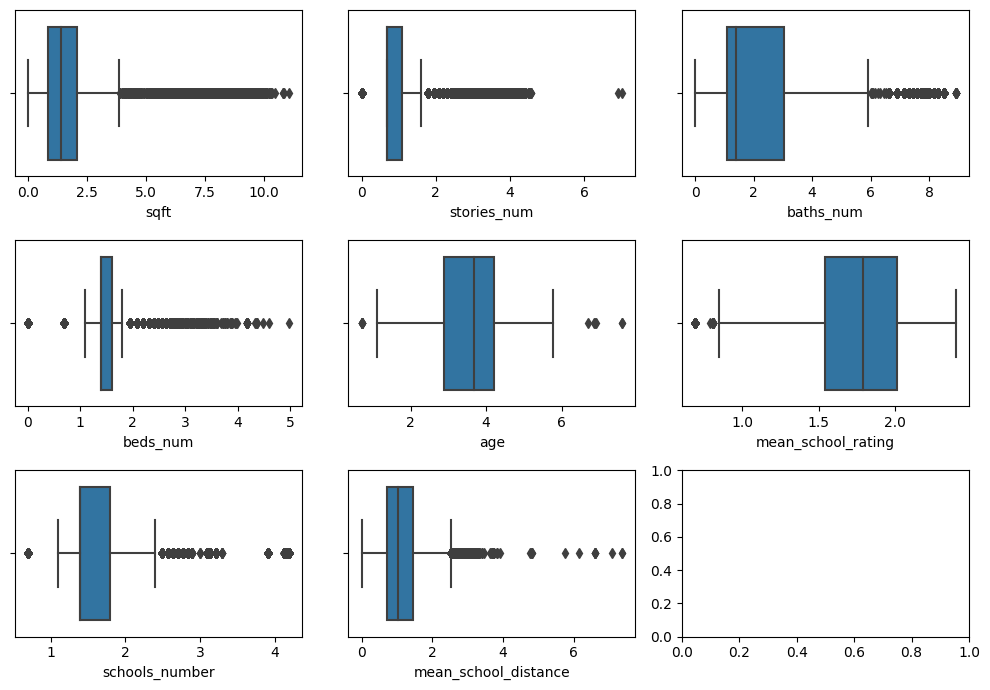

In [37]:
# Посмотрим, нормализуется ли отображение после логарифмирования
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7))

feature_n = 0
for row in [0, 1, 2]:
    if feature_n > 7: break
    for col in [0, 1, 2]:  
        if feature_n > 7: break
        sns.boxplot(x=np.log(data2[num_columns[feature_n]]+1), ax=axes[row, col])
        feature_n += 1

plt.tight_layout()
plt.show()

In [38]:

def outliers_iqr(data, feature, lower_n=1.5, upper_n=1.5):
    
    x = data[feature]
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - lower_n*IQR
    upper_bound = Q3 + upper_n*IQR
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    
    print(f'{feature}:')
    print('lower_bound:', round(lower_bound, 2))
    print('upper_bound:', round(upper_bound, 2))
    
    return outliers, cleaned

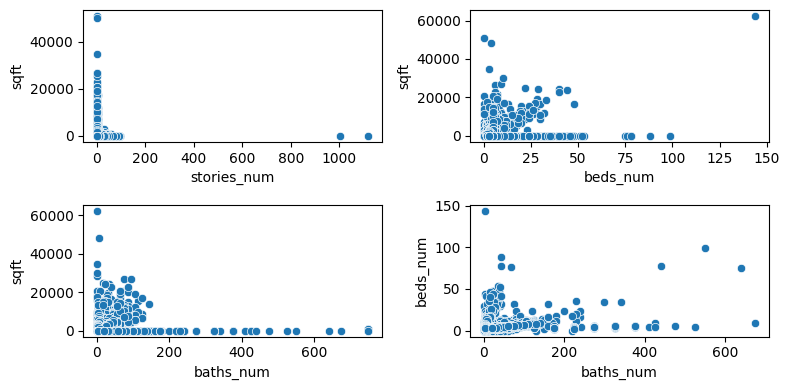

In [39]:
# Ассиметрия сохранилась после логарифмирования, поэтому для выявления выбросов, возможно, будем использовать ручной метод
# Посмотрим, как могут быть взаимосвязаны признаки

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 4))

sns.scatterplot(data2, x='stories_num', y='sqft', ax=axes[0,0]);
sns.scatterplot(data2, x='beds_num', y='sqft', ax=axes[0,1]);
sns.scatterplot(data2[data2['baths_num']<1000], x='baths_num', y='sqft', ax=axes[1,0], );
sns.scatterplot(data2, x='baths_num', y='beds_num', ax=axes[1,1]);

plt.tight_layout()
plt.show()

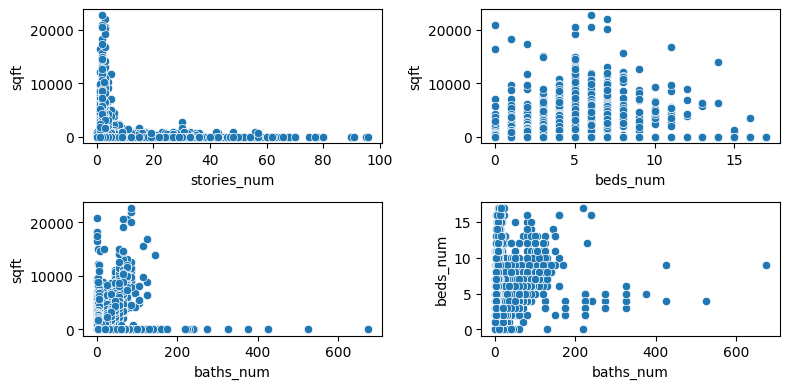

Текущее кол-во строк: 192506


In [40]:


# Уже заметно, что объекты с этажами от 200 - это выбросы, также объекты с площадью более 25 тыс стоят особняком
# Посчитаем их за выбросы
data2 = data2[data2['stories_num']<200]
data2 = data2[data2['sqft']<25000]

# Учтем некоторые другие наблюдения:
data2 = data2[data2['beds_num']<18]
# Хоть и сложно представить но пока не будем трогать baths_num<200 
data2 = data2[data2['beds_num']<200]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 4))

sns.scatterplot(data2, x='stories_num', y='sqft', ax=axes[0,0]);
sns.scatterplot(data2, x='beds_num', y='sqft', ax=axes[0,1]);
sns.scatterplot(data2[data2['baths_num']<1000], x='baths_num', y='sqft', ax=axes[1,0], );
sns.scatterplot(data2, x='baths_num', y='beds_num', ax=axes[1,1]);

plt.tight_layout()
plt.show()

print('Текущее кол-во строк:', data2.shape[0])

In [41]:
# Заменим нулевые значения (они, очевидно, являются недействительными) на np.NaN
data2['sqft'] = data2['sqft'].apply(lambda x: np.NaN if x==0 else x)
data2['stories_num'] = data2['stories_num'].apply(lambda x: np.NaN if x==0 else x)
data2['baths_num'] = data2['baths_num'].apply(lambda x: np.NaN if x==0 else x)
data2['beds_num'] = data2['beds_num'].apply(lambda x: np.NaN if x==0 else x)

In [42]:
# Все-таки кажутся странными аномальные числа для количества ванных комнат и спален...
# Попробуем поменять тип этих признаков на категориальный, оставив несколько топ значений по частотности и создав категорию others для всех остальных.
print(data2['baths_num'].value_counts().iloc[0:6], end='\n\n')
print(data2['beds_num'].value_counts().iloc[:6])

data2['baths_num'] = data2['baths_num'].apply(lambda x: 'others' if x not in range(1, 5) else x)
data2['beds_num'] = data2['beds_num'].apply(lambda x: 'others' if x not in range(1, 6) else x)



2.0     58990
3.0     39405
4.0     15904
20.0    12862
30.0     9082
25.0     8738
Name: baths_num, dtype: int64

3.0    79745
4.0    53032
2.0    32138
5.0    16503
6.0     4520
1.0     3326
Name: beds_num, dtype: int64


count    181710.000000
mean         43.854262
std          33.193105
min           3.000000
25%          17.000000
50%          38.000000
75%          67.000000
max         966.000000
Name: age, dtype: float64


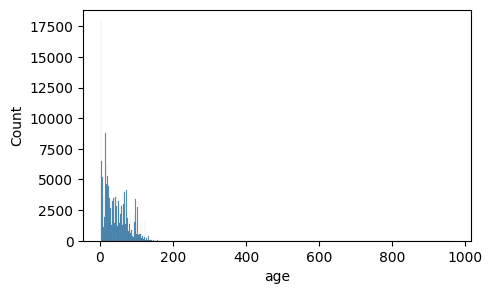

In [43]:
# ВИдим, что возраст некоторых объектов якобы доходит почти до 1000 лет, что сомнительно
# При этом 75% объектов не старше 67 лет
# Заметим, что отрицательные значения у этого признака удалились
print(data2['age'].describe())

plt.figure(figsize=(5, 3))
sns.histplot(data2, x='age');

In [44]:
# Из графика: особо сомнительны объекты старше 200 лет
data2 = data2[data2['age']<=200]
print('Текущее кол-во строк:', data2.shape[0])

Текущее кол-во строк: 181644


In [45]:
# Признак количества ближайших школ также ассиметричен вправо
# Довольно сложно проследить выбросы, так как непонятно, от чего может зависеть
# Посмотрим, что скажет таблица корреляции

corr_df = data2.corr().dropna(thresh=0.99, axis=1).dropna(thresh=1, axis=0).fillna('-')*100
print('Поазатели корреляции:')
display(np.abs(corr_df['schools_number'].round(2)).sort_values())

Поазатели корреляции:


C:\Users\Питерские котики\AppData\Local\Temp\ipykernel_11688\4135677457.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = data2.corr().dropna(thresh=0.99, axis=1).dropna(thresh=1, axis=0).fillna('-')*100


stories_num               1.78
PrivatePool               3.63
age                       5.56
mean_school_distance      5.80
max_grade                 6.91
zipcode                   7.74
mean_school_rating        8.68
grades_pk                 9.11
grades_k                 19.41
sqft                     20.58
min_grade                23.42
schools_number          100.00
Name: schools_number, dtype: float64

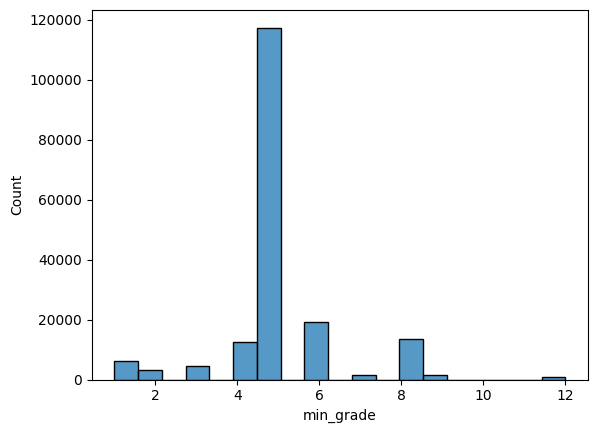

Количество выбросов по минимальному учебному классу: 909


In [46]:
# Получается, что наибольшая связь у признака с данными по минимальному учебному классу в ближайших школах
# Рассмотрим этот признак подробнее
sns.histplot(data2, x='min_grade');
plt.show()
# Смущают минимальные классы от 10-го.
print('Количество выбросов по минимальному учебному классу:', data2[data2['min_grade']>=10].shape[0])

# Не хочется удалять эти строки, поэтому обнулим их, чтобы затем заполнить их средними значениями, 
# то есть постараемся сделать данные более обычными 
data2['min_grade'] = data2['min_grade'].apply(lambda x: np.NaN if x>=10 else x)


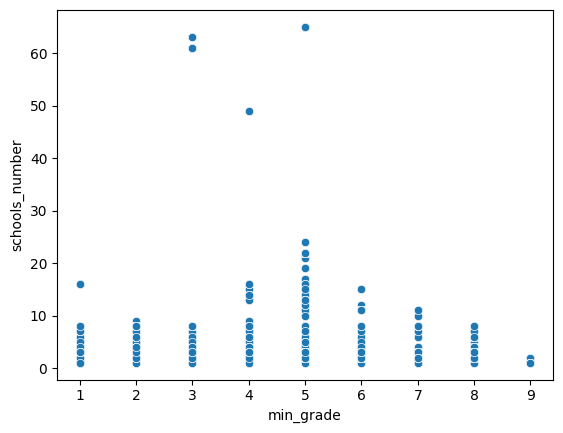

schools_number > 30: 1224


In [47]:
sns.scatterplot(data2, x='min_grade', y='schools_number');
plt.show()

# Посмотрим, сколько строк не будет удовлетворять условию
print('schools_number > 30:', data2[data2['schools_number']>30].shape[0])

# Возьмем порог 30 школ для устранения выбросов (путем замены значений)
data2['schools_number'] = data2['schools_number'].apply(lambda x: np.NaN if x>30 else x)



Log:
mean_school_distance:
lower_bound: -0.27
upper_bound: 2.3

Верхний порог для mean_school_distance: 10

Количество выбросов mean_school_distance: 31
Текущее кол-во строк: 180486


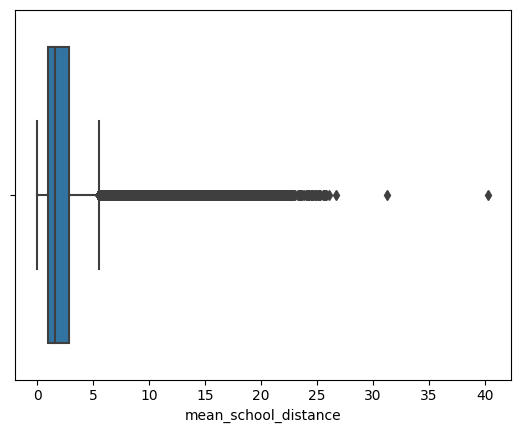

In [48]:
# Признак 'mean_school_distance' мало коррелирует с остальными
# Узнаем порог для выбросов с точки зрения метода IQR-размаха
# Передадим логарифмированный признак, чтобы узнать верхнюю границу
print('\nLog:')
_ = outliers_iqr(np.log(data2[['mean_school_distance']]+1), 'mean_school_distance')

print('\nВерхний порог для mean_school_distance:', round(np.exp(2.3)))

# Сверимся с диаграммой 
sns.boxplot(data2[data2['mean_school_distance']<100], x='mean_school_distance')
# Отодвинем порог до 25
print('\nКоличество выбросов mean_school_distance:', data2[data2['mean_school_distance']>25].shape[0])
# Удалим их, поскольку вряд ли удастся качественно замениить на другие (из-за низкой корреляции)
data2 = data2[data2['mean_school_distance']<=25]
print('Текущее кол-во строк:', data2.shape[0])

## Есть ли среди признаков малоинформативные?

In [49]:
# Приведем функцию для определения малоинформативности

def check_informativeness(df_col=np.NaN, df=np.NaN):
    
    def calc_inform(col):
        max_val_ratio = round(col.value_counts().max()*100/col.shape[0], 3)
        nunique_ratio = round(col.nunique()*100/col.shape[0], 3)
        warning = 'is over 95%' if (max_val_ratio>95) or (nunique_ratio>95) else '-'
        
        result = pd.DataFrame({
            col.name: {
                'max_val_ratio': max_val_ratio, 
                'nunique_ratio': nunique_ratio,
                'warning': warning,
            }
        }).transpose()
        
        return result
    
    if df_col is not np.NaN:
        return calc_inform(df_col)
    
    if df is not np.NaN:
        df_dict = {}
        
        for col in df.columns:
            df_dict[col] = calc_inform(df[col]).iloc[0].to_dict()
    
        result = pd.DataFrame(df_dict).transpose()
        
    return result

display(check_informativeness(df=data2))

,max_val_ratio,nunique_ratio,warning
city,7.529,0.776,-
sqft,6.645,3.721,-
zipcode,0.41,2.114,-
state,26.63,0.017,-
PrivatePool,83.232,0.001,-
target,0.513,12.828,-
fireplace_type,61.344,0.005,-
stories_num,45.094,0.044,-
baths_num,36.151,0.003,-
beds_num,41.399,0.003,-


In [50]:
# Выявиди два малоинформативных признака, которые удалим
data2.drop(columns=['is_remodeled', 'max_grade'], inplace=True)

## Заполнение пропусков

In [51]:
print('Размер датасета:', data2.shape)

print('Процент пропусков:')
data2_nans = (data2.isna().sum()*100/data2.shape[0]).sort_values(ascending=False)
data2_nans = data2_nans[data2_nans>0]
print(data2_nans)

# Выведем табл.корреляции, чтобы удобнее было подбирать признаки для замены
num_nans = list(set(data2_nans.index).difference(set(data2.select_dtypes(include='object'))))
corr_df = (data2.corr(numeric_only=True)[num_nans].fillna('-')*100).round(2)
print('\n\nПоазатели корреляции:')
display(np.abs(corr_df))

Размер датасета: (180486, 22)
Процент пропусков:
status_type           15.606751
sqft                  14.092506
stories_num            6.100750
schools_number         0.678169
min_grade              0.513613
mean_school_rating     0.325233
city                   0.002216
dtype: float64


Поазатели корреляции:


,sqft,mean_school_rating,min_grade,stories_num,schools_number
sqft,100.00,2.76,30.53,1.52,43.07
zipcode,10.46,12.76,1.89,11.55,11.38
PrivatePool,17.08,16.74,8.26,8.93,2.87
stories_num,1.52,6.23,7.76,100.00,2.16
age,6.94,27.64,8.85,3.57,3.97
mean_school_rating,2.76,100.00,3.12,6.23,3.74
schools_number,43.07,3.74,29.91,2.16,100.00
mean_school_distance,0.33,13.32,15.52,0.86,20.06
grades_pk,13.10,2.33,6.35,0.25,9.43
grades_k,27.75,2.79,12.96,1.22,22.35


In [52]:
# sqft
data2['sqft'] = data2['sqft'].fillna(data2.groupby(['min_grade', 'schools_number'])['sqft'].transform('mean'))
data2['sqft'] = data2['sqft'].fillna(data2.groupby(['schools_number'])['sqft'].transform('mean'))
data2['sqft'] = data2['sqft'].fillna(data2.groupby(['min_grade', 'grades_k'])['sqft'].transform('mean'))
# stories_num
data2['stories_num'] = data2['stories_num'].fillna(data2.groupby(['PrivatePool', 'zipcode'])['stories_num'].transform('mean'))
data2['stories_num'] = data2['stories_num'].fillna(data2.groupby('zipcode')['stories_num'].transform('mean'))
data2['stories_num'] = data2['stories_num'].fillna(data2.groupby('beds_num')['stories_num'].transform('mean'))
# baths_num
data2['baths_num'] = data2['baths_num'].fillna(data2.groupby(['zipcode', 'beds_num'])['baths_num'].transform(lambda x: x.value_counts().index[0]))
data2['baths_num'] = data2['baths_num'].fillna(data2.groupby('beds_num')['baths_num'].transform(lambda x: x.value_counts().index[0]))
data2['baths_num'] = data2['baths_num'].fillna(data2.groupby(['sqft'])['baths_num'].transform(lambda x: x.value_counts().index[0]))
data2['baths_num'] = data2['baths_num'].fillna(data2.groupby(['stories_num'])['baths_num'].transform(lambda x: x.value_counts().index[0]))
# schools_number
data2['schools_number'] = data2['schools_number'].fillna(data2.groupby(['sqft', 'min_grade'])['schools_number'].transform('mean'))
data2['schools_number'] = data2['schools_number'].fillna(data2.groupby(['grades_k', 'min_grade'])['schools_number'].transform('mean'))
# min_grade
data2['min_grade'] = data2['min_grade'].fillna(data2.groupby(['sqft', 'schools_number'])['min_grade'].transform('mean'))
data2['min_grade'] = data2['min_grade'].fillna(data2.groupby(['grades_k', 'sqft'])['min_grade'].transform('mean'))
data2['min_grade'] = data2['min_grade'].fillna(data2.groupby(['grades_k', 'mean_school_distance'])['min_grade'].transform('mean'))
# beds_num
data2['beds_num'] = data2['beds_num'].fillna(data2.groupby(['baths_num'])['beds_num'].transform(lambda x: x.value_counts().index[0]))
data2['beds_num'] = data2['beds_num'].fillna(data2.groupby(['sqft'])['beds_num'].transform(lambda x: x.value_counts().index[0]))
data2['beds_num'] = data2['beds_num'].fillna(data2.groupby(['stories_num'])['beds_num'].transform(lambda x: x.value_counts().index[0]))

data2['mean_school_rating'] = data2['mean_school_rating'].fillna(data2.groupby(['PrivatePool', 'age'])['mean_school_rating'].transform('mean'))

data2['status_type'] = data2['status_type'].fillna('unknown')
data2['city'] = data2['city'].fillna(data2.groupby(['state', 'zipcode'])['city'].transform(lambda x: x.value_counts().index[0]))

print('Кол-во пропусков в датасете:', data2.isna().sum().sum())

Кол-во пропусков в датасете: 0


## Кодирование признаков

In [53]:
data2.describe(include='object')
# Видим, что наибольшее число значений содержится в поле city

,city,state,target,fireplace_type,baths_num,beds_num,heating_type,parking_type,street_type,property_type,status_type
count,180486,180486,180486,180486,180486,180486.0,180486,180486,180486,180486,180486
unique,1401,31,23152,9,5,6.0,12,17,25,9,21
top,houston,FL,"$225,000",unknown,others,3.0,air,attached,st,single family,activated
freq,13589,48063,926,110717,65247,74720.0,103407,59681,40119,135026,133963


In [54]:
data2.describe(include='number')

,sqft,zipcode,PrivatePool,stories_num,age,mean_school_rating,schools_number,mean_school_distance,grades_pk,grades_k,min_grade
count,180486.000000,180486.000000,180486.000000,180486.000000,180486.000000,180486.000000,180486.000000,180486.000000,180486.000000,180486.000000,180486.00000
mean,365.683555,54301.325067,0.167681,1.944675,43.742584,5.118846,4.041037,2.510741,0.741825,0.349312,5.08642
std,927.348873,26644.988822,0.373583,2.647793,32.857939,1.976747,2.947794,2.650695,0.437632,0.476754,1.35158
min,1.000000,1103.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.020000,0.000000,0.000000,1.00000
25%,2.613000,33069.000000,0.000000,1.000000,17.000000,3.500000,3.000000,1.010000,0.000000,0.000000,5.00000
50%,6.000000,44121.000000,0.000000,2.000000,38.000000,5.000000,3.000000,1.630000,1.000000,0.000000,5.00000
75%,30.502104,78209.000000,0.000000,2.000000,67.000000,6.500000,3.913713,2.820000,1.000000,1.000000,5.00000
max,22740.000000,99338.000000,1.000000,96.000000,200.000000,10.000000,24.000000,24.920000,1.000000,1.000000,9.00000


In [55]:
data2.dtypes.sort_index()

PrivatePool               int64
age                     float64
baths_num                object
beds_num                 object
city                     object
fireplace_type           object
grades_k                  int64
grades_pk                 int64
heating_type             object
mean_school_distance    float64
mean_school_rating      float64
min_grade               float64
parking_type             object
property_type            object
schools_number          float64
sqft                    float64
state                    object
status_type              object
stories_num             float64
street_type              object
target                   object
zipcode                 float64
dtype: object

### Выясняем корреляцию с признаком city

In [56]:
obj_columns = data2.select_dtypes(include='object').columns
num_columns = data2.select_dtypes(include='number').columns

# Попробуем заменить признак city данными полученными от кластеризации по признакам, которые имеют наибольшую силу корреляции с исходным
# Для определения корреляции будет использовать непараметрические тесты
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr


chi_stat = []
chi_p = []

for col in obj_columns:
    # Создание таблицы сопряженности для проведения теста хи-квадрат
    contingency_table = pd.crosstab(data2['city'], data2[col])

    # Проведение теста хи-квадрат
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi_stat.append(round(chi2, 2))
    chi_p.append(round(p_value, 2))
   
# Вывод результатов
chi_df = pd.DataFrame(data= {'': obj_columns, 'Статистика': chi_stat, 'p-значение': chi_p}).sort_values(by='Статистика', ascending=False)
print('Корреляция city с нечисловыми признаками:', chi_df, sep='\n', end='\n\n')


spear_corr = []
spear_p = []

for col in num_columns:
    correlation, p_value = spearmanr(data2['city'], data2[col])
    spear_corr.append(round(np.abs(correlation), 2))
    spear_p.append(round(p_value, 2))
    
spear_df = pd.DataFrame(data= {'': num_columns, 'Статистика': spear_corr, 'p-значение': spear_p}).sort_values(by='Статистика', ascending=False)
print('Корреляция city с числовыми признаками:', spear_df, sep='\n', end='\n\n')

Корреляция city с нечисловыми признаками:
                      Статистика  p-значение
0             city  2.526804e+08         0.0
2           target  3.444857e+07         0.0
1            state  4.795122e+06         0.0
10     status_type  5.287654e+05         0.0
8      street_type  2.701220e+05         0.0
6     heating_type  2.683381e+05         0.0
7     parking_type  2.561904e+05         0.0
3   fireplace_type  2.114885e+05         0.0
9    property_type  1.638349e+05         0.0
4        baths_num  6.800116e+04         0.0
5         beds_num  4.574911e+04         0.0



c:\Users\Питерские котики\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Корреляция city с числовыми признаками:
                          Статистика  p-значение
1                zipcode        0.07         0.0
6         schools_number        0.05         0.0
7   mean_school_distance        0.04         0.0
3            stories_num        0.03         0.0
8              grades_pk        0.03         0.0
10             min_grade        0.03         0.0
0                   sqft        0.02         0.0
2            PrivatePool        0.02         0.0
4                    age        0.02         0.0
5     mean_school_rating        0.02         0.0
9               grades_k        0.02         0.0



In [57]:
# Для кластеризации возьмем признаки state, status_type, zipcode, schools_number

state_dummies = pd.get_dummies(data2['state']) 
status_dummies = pd.get_dummies(data2['status_type'])

data2['zipcode'] = data2['zipcode'].astype(int)
data2['schools_number'] = data2['schools_number'].astype(int)

city_cluster_features = pd.concat([state_dummies, status_dummies, data2['zipcode'], data2['schools_number']], axis=1)

### Кластеризация для замены city

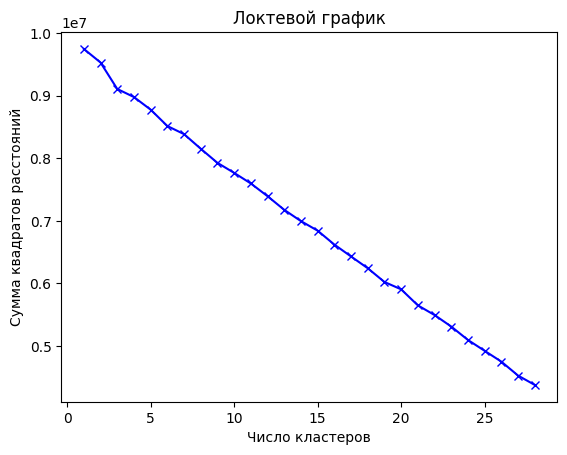

In [58]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
city_features_scaled = scaler.fit_transform(city_cluster_features)

# Определение диапазона числа кластеров методом локтя
n = 30
n_clusters_range = range(1, n - 1)

# Вычисление суммы квадратов расстояний для каждого числа кластеров
inertia_values = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(city_features_scaled)
    inertia_values.append(kmeans.inertia_)
    
    
# Построение локтевого графика
import matplotlib.pyplot as plt
plt.plot(n_clusters_range, inertia_values, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Локтевой график')
plt.show()

### Кодирование категориальных признаков

In [59]:
data2.select_dtypes('object').columns

Index(['city', 'state', 'target', 'fireplace_type', 'baths_num', 'beds_num',
       'heating_type', 'parking_type', 'street_type', 'property_type',
       'status_type'],
      dtype='object')

In [60]:
# Мы не получили какого-то оптимального числа кластеров для кластеризации, чтобы можно было сократить число уникальных значений в признаке городов
# В таком случае просто закодируем оригинальный признак 
import category_encoders as ce

city_b_codes = ce.BinaryEncoder().fit_transform(data2['city'])
# Промежуточные итоги по датасету:
data2 = data2.drop(columns=['city', 'state', 'status_type'])

data2 = pd.concat(
    [data2,
    city_b_codes,
    state_dummies,
    status_dummies],
    axis=1
)

# Также закодируем другие категориальные признки
rest_obj_col = list(data2.select_dtypes('object').columns)
rest_obj_col.remove('target')

data2 = pd.concat(
    [data2,
    pd.get_dummies(data2[rest_obj_col]),
    ],
    axis=1
)

data2.drop(columns=rest_obj_col, inplace=True)

print('Размер датасета:', data2.shape)


Размер датасета: (180486, 158)


### Преобразование числовых признаков

In [61]:
data2['stories_num'] = data2['stories_num'].astype(np.uint8)
data2['min_grade'] = data2['min_grade'].astype(np.uint8)

data2['mean_school_rating'] = data2['mean_school_rating'].apply(lambda x: round(x, 2)).astype(np.float16)
data2['mean_school_distance'] = data2['mean_school_distance'].apply(lambda x: round(x, 2)).astype(np.float16)

data2['grades_pk'] = data2['grades_pk'].astype(np.uint8)
data2['grades_k'] = data2['grades_k'].astype(np.uint8)

data2 ['age'] = data2['age'].astype(np.uint8)

In [62]:
print(data2.select_dtypes(exclude='number').dtypes)

# Остался один категориальный признак - целевой. Преобразуем его и сохраним отдельно
target = data2['target']
target = target.replace(r'[\$|\+]', '', regex=True).replace(r'(?<=\d)\,(?=\d)', '', regex=True).apply(float)
data2.drop('target', axis=1, inplace=True)

target    object
dtype: object


In [63]:
data2.to_csv('data/ml/data2.csv')
target.to_csv('data/ml/target.csv')